# Day4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import comcast data into Python environment.
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [3]:
df.isnull().values.any()

True

In [4]:
df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


# Quesion 1:How many different companies are represented in the data set?

In [5]:
print(df["Company Name"].nunique())

439


In [6]:
# Answer 439 different companies are represented in the data set

# Quesion 2:What is the total number of jobs created for businesses in Queens?

In [7]:
df['City'].str.contains('Queens',case=False).sum()

73

In [8]:
# Answer: 73 total number of jobs created for businesses in Queens.

# Question 3: How many different unique email domains names are there in the data set?

In [9]:
df['domain'] = df['company email'].str.split('@').str[1]

In [10]:
df['domain'].value_counts()

gmail.com             30
aol.com               22
verizon.net            3
yahoo.com              3
energyspec.com         3
                      ..
werwaissandco.com      1
epic-pharma.com        1
jonathanburden.com     1
empressmam.com         1
gcreate.com            1
Name: domain, Length: 356, dtype: int64

In [11]:
df['domain'].nunique()

356

In [12]:
# Answer: 356 different unique email domains names are there in the data set.

# Qustion 4 and 5: Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? Save your result for the previous question as a CSV file.

In [13]:
df_new = df[['NTA', 'Job created', 'Total Savings']].dropna()
df_new 

,NTA,Job created,Total Savings
29,Whitestone,10.0,4026.73
95,Mott Haven-Port Morris,5.0,3057.76
120,Hunts Point,12.0,181579.24
137,Maspeth,10.0,52.33
325,College Point,2.0,54127.14
353,Mott Haven-Port Morris,2.0,1.85
414,East New York,15.0,10646.47
432,Mott Haven-Port Morris,3.0,18.70
433,Steinway,20.0,2056.80
445,Bushwick South,10.0,35384.76


In [14]:
Total_Job_created=df_new .groupby(by='NTA')['Job created'].sum().to_frame()

pd.set_option('display.max_columns', None)
Total_Job_created
df1 = Total_Job_created.rename({'Job created': 'Total_Job_created'}, axis=1)
df1

,Total_Job_created
NTA,
Bushwick South,10.0
College Point,2.0
East New York,15.0
Hunts Point,12.0
Maspeth,10.0
Mott Haven-Port Morris,10.0
Steinway,20.0
Whitestone,10.0


In [15]:
Avg_total_saving=df_new .groupby(by='NTA')['Total Savings'].mean().to_frame()
#Avg_total_saving=Avg_total_saving.to_frame()
Avg_total_saving
df2 = Avg_total_saving.rename({'Total Savings': 'Avg_saving'}, axis=1)
df2

,Avg_saving
NTA,
Bushwick South,35384.760000
College Point,54127.140000
East New York,10646.470000
Hunts Point,181579.240000
Maspeth,52.330000
Mott Haven-Port Morris,1026.103333
Steinway,2056.800000
Whitestone,4026.730000


In [16]:
Avg=df1.merge(df2, how = "right" ,on ='NTA')
Avg

,Total_Job_created,Avg_saving
NTA,,
Bushwick South,10.0,35384.760000
College Point,2.0,54127.140000
East New York,15.0,10646.470000
Hunts Point,12.0,181579.240000
Maspeth,10.0,52.330000
Mott Haven-Port Morris,10.0,1026.103333
Steinway,20.0,2056.800000
Whitestone,10.0,4026.730000


In [17]:
Avg.to_csv('Average_Job_and_saving.csv', index=True)

# Day 5

# Question:  scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [18]:
dff = pd.read_csv("Average_Job_and_saving.csv")

In [19]:
x=dff['Total_Job_created']
y=dff['Avg_saving']

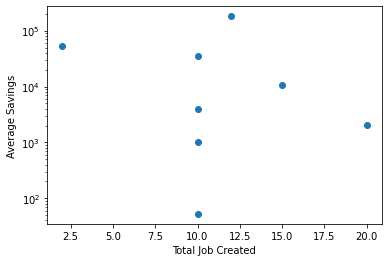

In [20]:
plt.scatter(x, y, alpha=1)
plt.yscale('log')
plt.xlabel('Total Job Created')
plt.ylabel('Average Savings')
plt.show()

In [21]:
#histogram of the log of the average total savings.

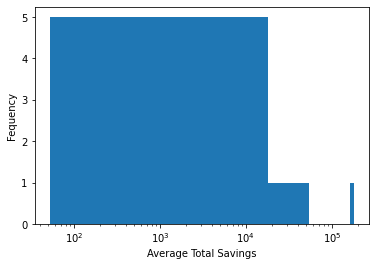

In [22]:
fig = plt.figure()
 
plt.hist(y)
plt.xscale('log')
plt.xlabel('Average Total Savings')
plt.ylabel('Fequency')
plt.show() 

In [23]:
#Import comcast data into Python environment.
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

# Question: line plot of the total jobs created for each month.

In [24]:
df_date = df[['Effective Date', 'Job created']].dropna()
df_date 

,Effective Date,Job created
29,03/05/2004,10.0
37,06/28/2007,60.0
95,11/06/2007,5.0
120,02/03/2005,12.0
137,03/01/2006,10.0
325,05/02/2007,2.0
353,04/10/2007,2.0
414,02/05/1993,15.0
432,06/08/2007,3.0
433,07/02/2007,20.0


In [25]:
df_date["Effective Date"] = pd.to_datetime(df_date["Effective Date"])

In [26]:
df_date = df_date.set_index(df_date["Effective Date"])

In [27]:
# set month dataframe for plotting complaint volume against month
Total_job=df_date["Effective Date"].value_counts().sort_index()


In [30]:
Monthly_Total_job = df_date.groupby(pd.Grouper(freq="M")).sum()
Monthly_Total_job

,Job created
Effective Date,
1993-02-28,15.0
1993-03-31,0.0
1993-04-30,0.0
1993-05-31,0.0
1993-06-30,0.0
...,...
2008-08-31,0.0
2008-09-30,0.0
2008-10-31,0.0


Text(0, 0.5, 'Total Job Created')

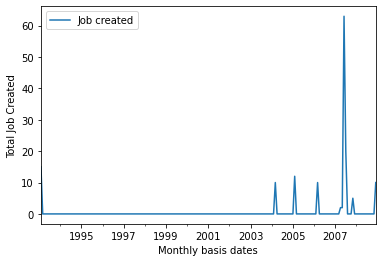

In [31]:
Monthly_Total_job.plot()
plt.xlabel('Monthly basis dates')
plt.ylabel('Total Job Created')